In [1]:
import numpy as np
from scipy.linalg import toeplitz, hankel
import matplotlib.pyplot as plt

In [ ]:
## https://cnx.org/contents/6x7LNQOp@7/Linear-Phase-Fir-Filter-Design-By-Least-Squares

In [40]:
# filter length
N = 31;  
M = (N-1)//2;

# set band-edges and stop-band weighting
wp = 0.5*np.pi;
ws = 0.6*np.pi;
K = 10;

# normalize band-edges for convenience
fp = wp/np.pi;
fs = ws/np.pi;

# construct q(k)
q = fp*np.sinc(fp*np.arange(1,2*M+1))-K*fs*np.sinc(fs*np.arange(1,2*M+1));
q = np.insert(q, 0, fp+K*(1-fs))

#q_fft = np.fft.fft(q)
#q = np.fft.ifft(np.abs(q_def))


# construct Q1, Q2, Q
Q1 = toeplitz(q[np.arange(0,M+1)]);
Q2 = hankel(q[np.arange(0,M+1)],q[np.arange(M,2*M+1)]);
Q  = (Q1 + Q2)/2;

# construct b
b  = fp*np.sinc(fp*np.arange(0,M+1));

# solve linear system to get a(n)
a  = np.linalg.solve(Q, b)

# form impulse response h(n)
h  = np.concatenate([np.flip(a[1:M+1]/2), np.array([a[0]]), a[1:M+1]/2])

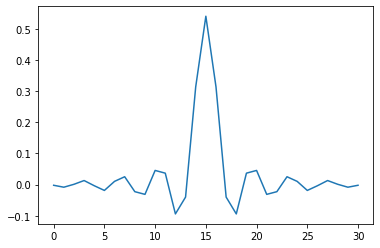

In [41]:
plt.plot(h)

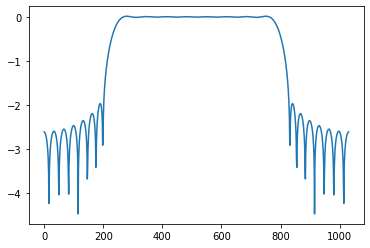

In [42]:
plt.plot(np.log10(np.fft.fftshift(np.abs(np.fft.fft(np.pad(h, (0, 1000)))))))